In [1]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = "clean loop"  # <-- Replace with your folder path

# List all files in the folder ending with _metrics.csv
files = [f for f in os.listdir(folder_path) if f.endswith('_metrics.csv')]

# List of dataframes
dfs = []

for file in files:
    # Extract algorithm and dataset names from the filename
    filename = os.path.splitext(file)[0]  # remove .csv
    parts = filename.split('_')
    if len(parts) >= 3:
        algorithm = parts[0]
        dataset = parts[1]
    else:
        continue  # skip if filename doesn't match pattern

    # Load CSV file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    # Add algorithm and dataset columns
    df['algorithm'] = algorithm
    df['dataset'] = dataset

    # Add dataframe to list
    dfs.append(df)

# Merge all dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

merged_df

,run_id,key,value,step,timestamp,algorithm,dataset
0,27ce05397b4545b78be97db5c01755e4,mae,1.030017,0,1748966106149,CBF,amazon
1,27ce05397b4545b78be97db5c01755e4,intra_list_similarity,0.022486,0,1748966106149,CBF,amazon
2,27ce05397b4545b78be97db5c01755e4,intra_list_dissimilarity,0.977514,0,1748966106149,CBF,amazon
3,27ce05397b4545b78be97db5c01755e4,item_coverage,0.727273,0,1748966106149,CBF,amazon
4,27ce05397b4545b78be97db5c01755e4,mrr,0.011725,0,1748966106149,CBF,amazon
...,...,...,...,...,...,...,...
112,48f72f45dada4a55a53d11c0b21178a8,precision_at_k,0.739130,0,1748967195203,RL,postrec
113,48f72f45dada4a55a53d11c0b21178a8,recall,0.002405,0,1748967195203,RL,postrec
114,48f72f45dada4a55a53d11c0b21178a8,recall_at_k,0.059276,0,1748967195203,RL,postrec
115,48f72f45dada4a55a53d11c0b21178a8,rmse,1.518059,0,1748967195203,RL,postrec


In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metrics = merged_df['key'].unique()
metrics.sort()

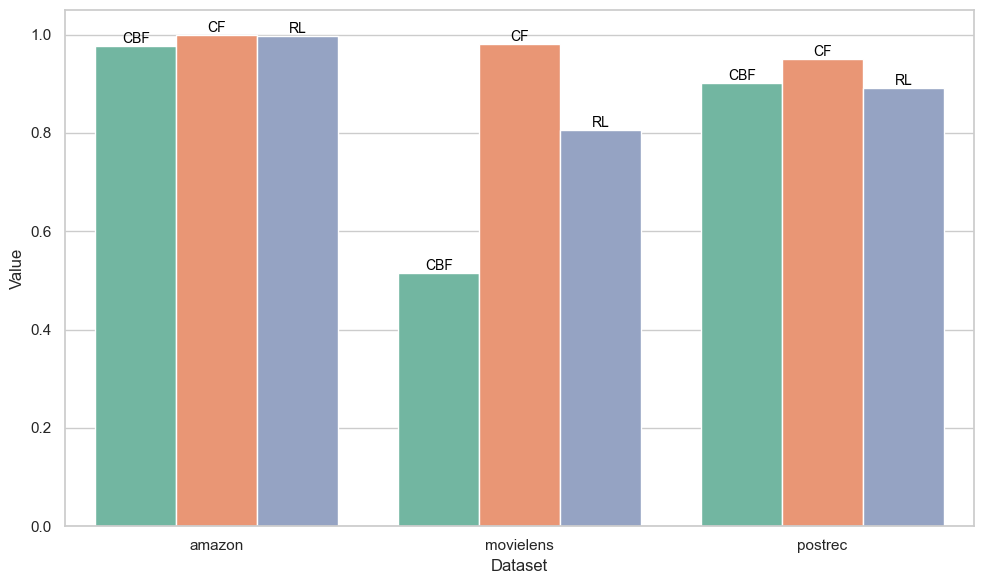

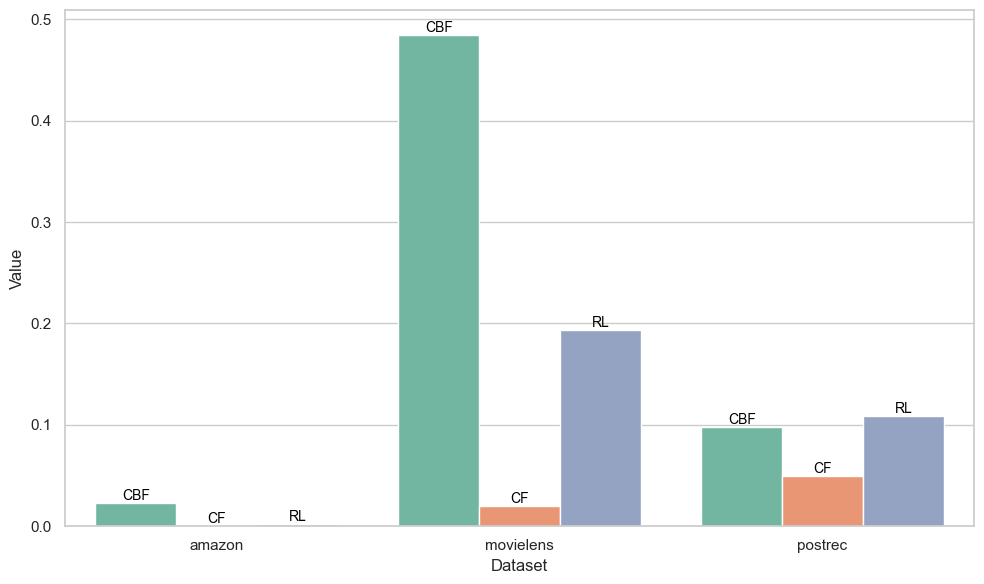

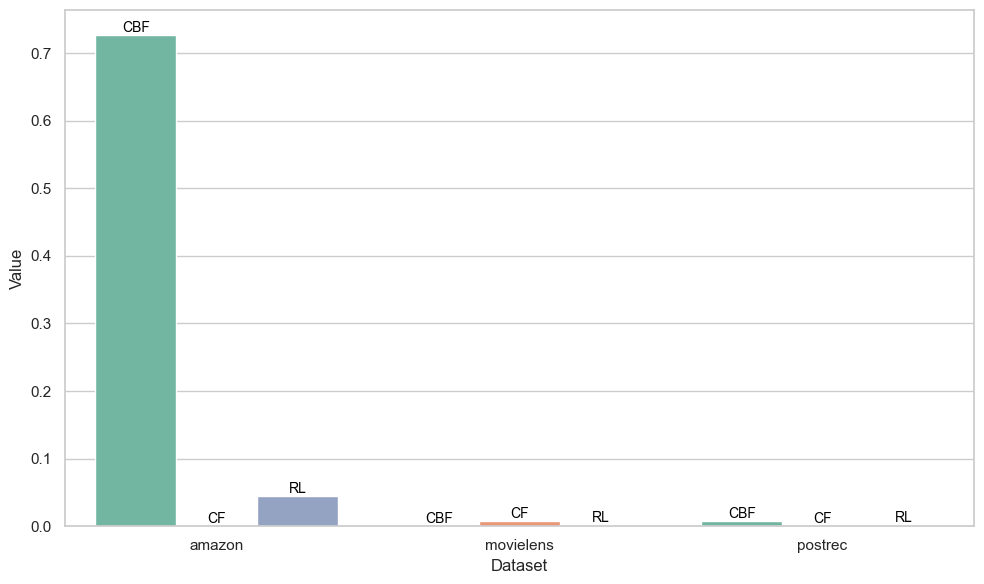

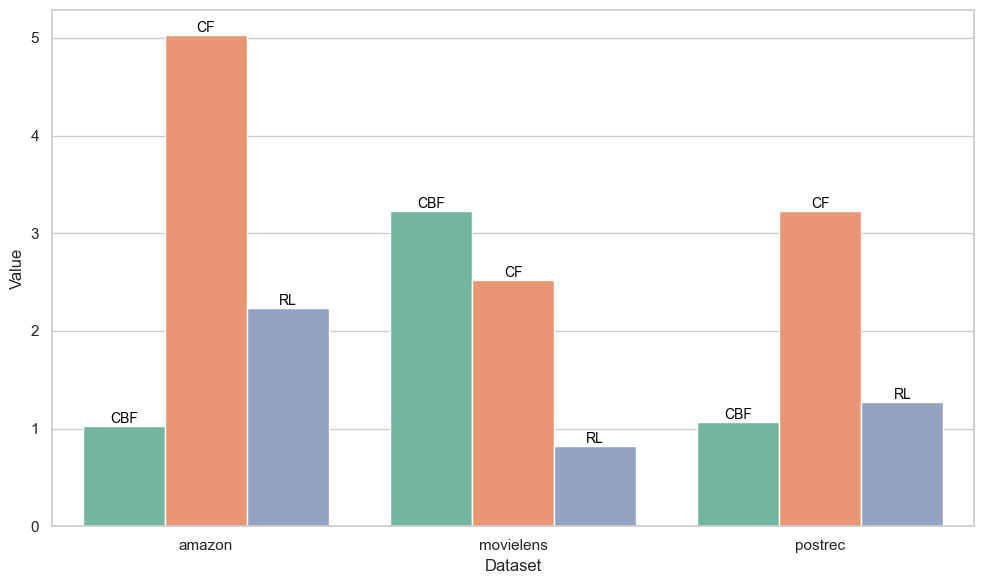

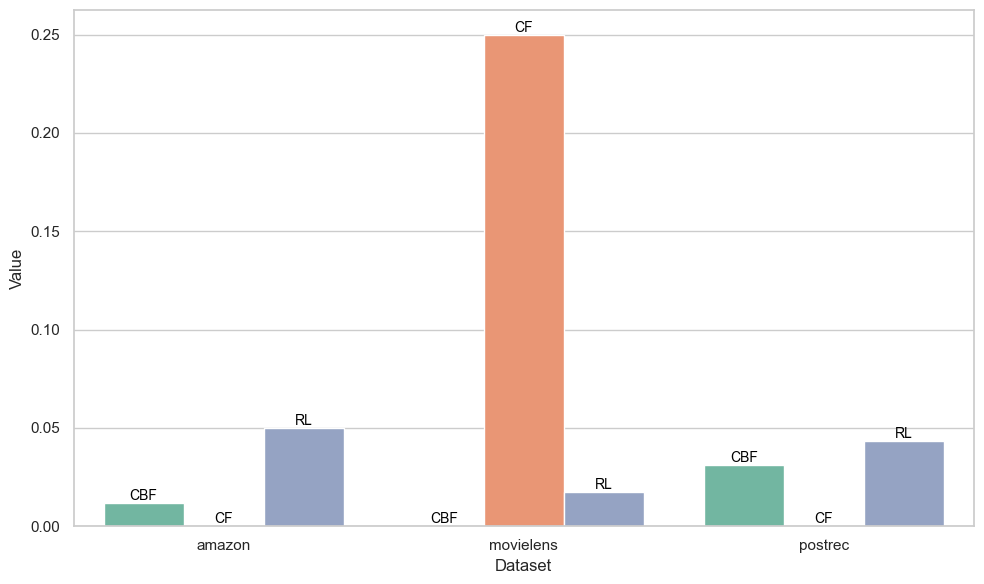

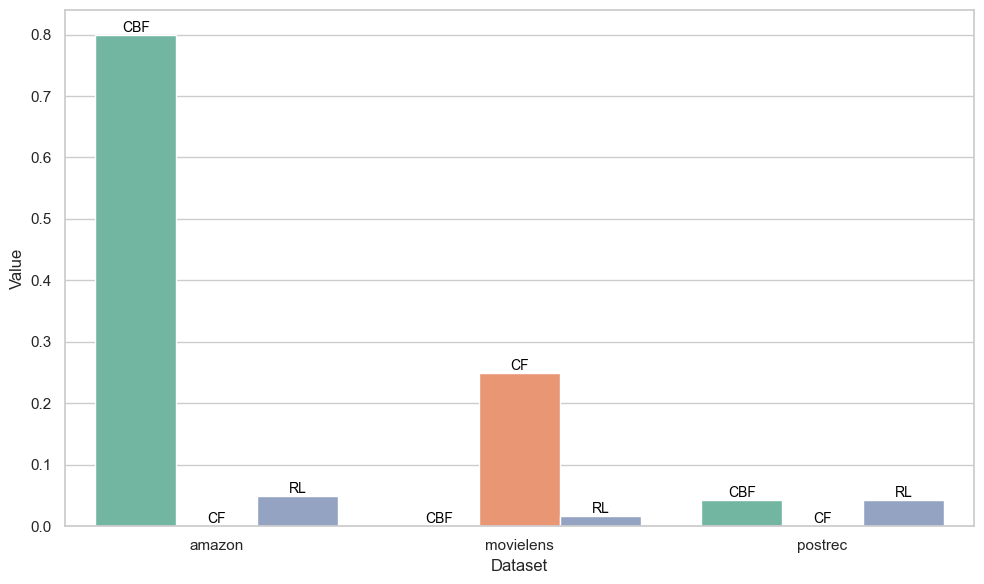

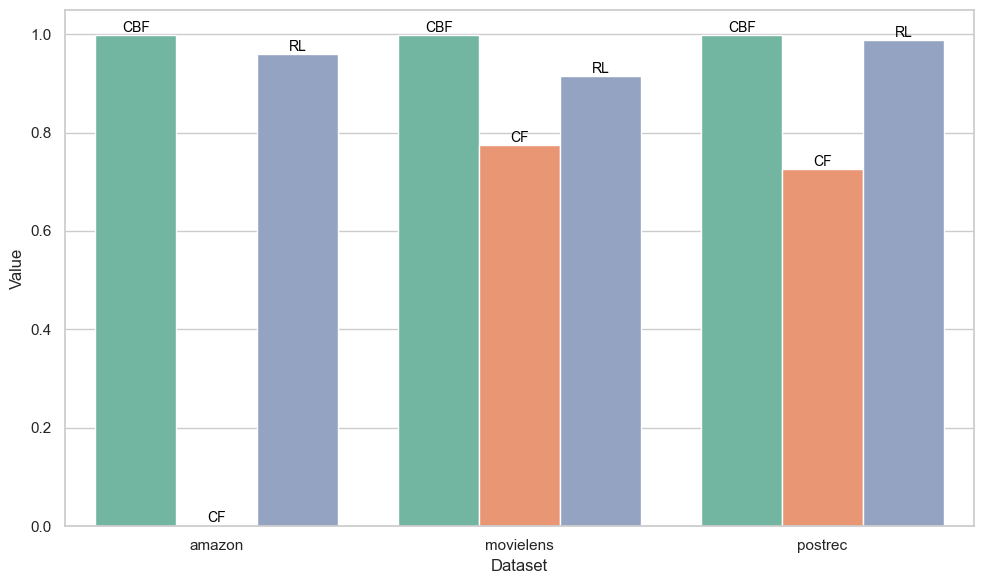

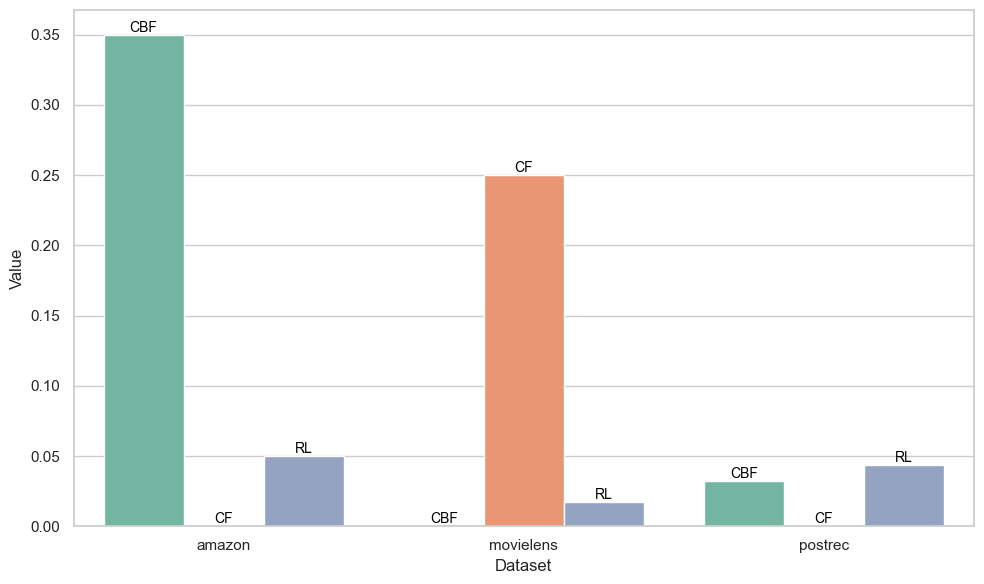

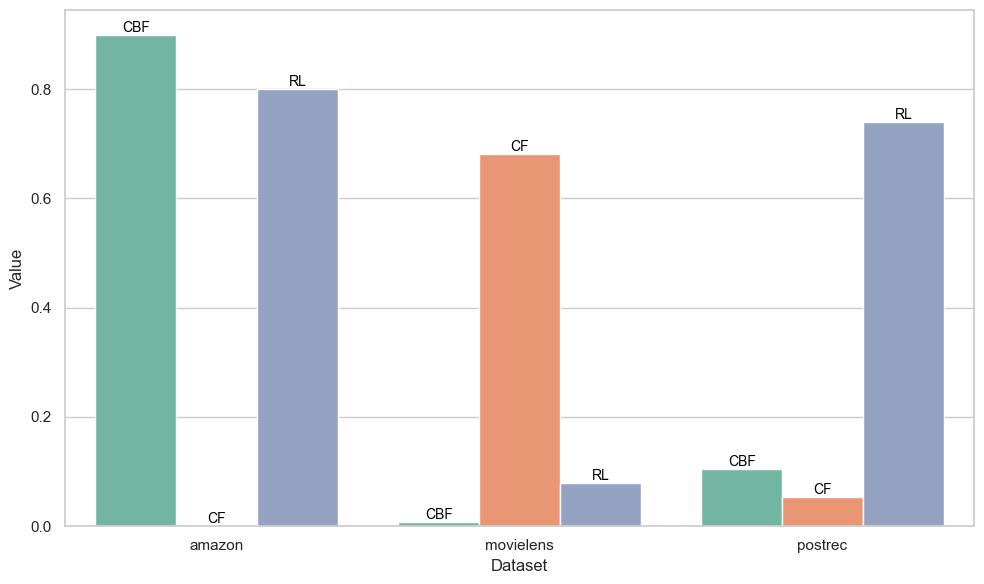

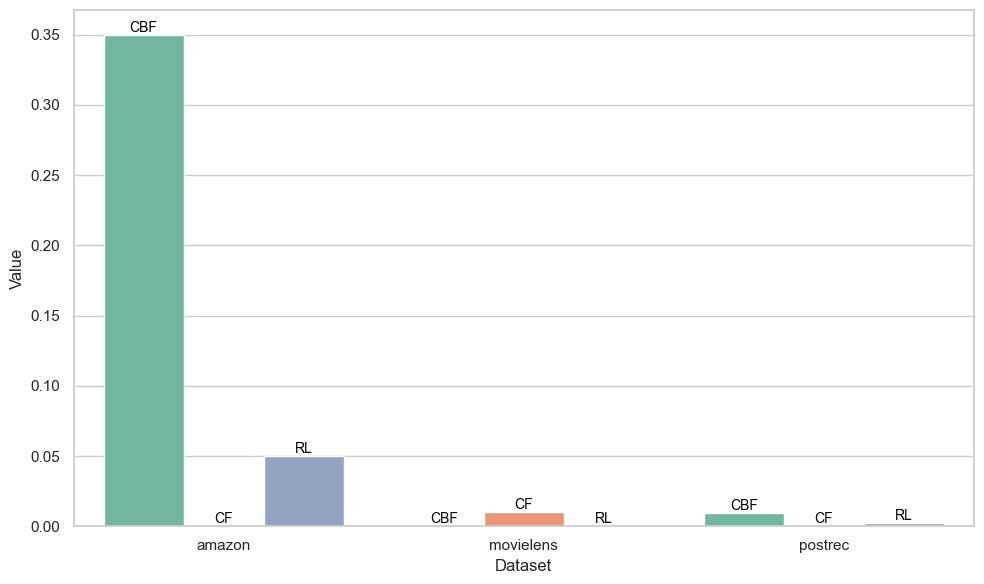

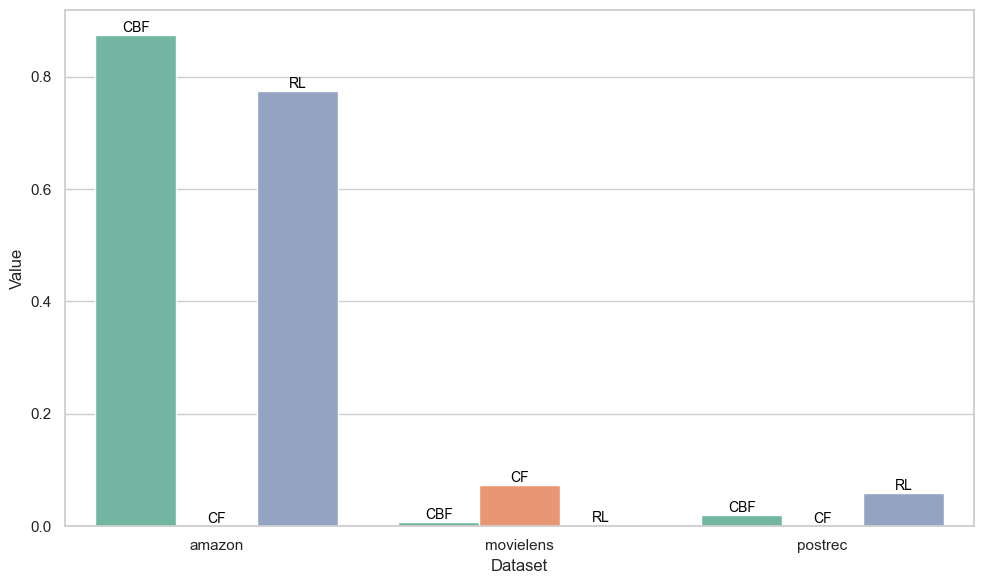

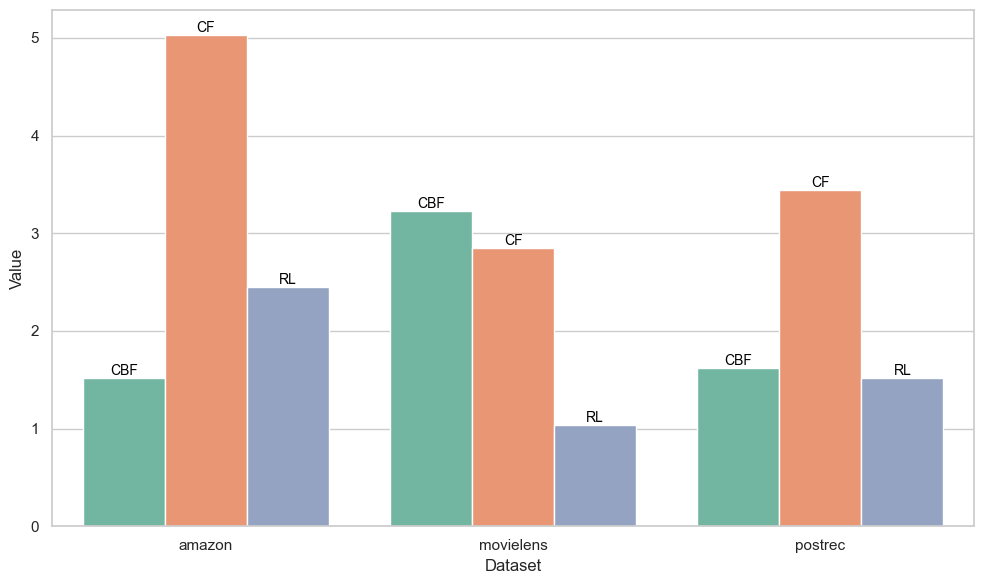

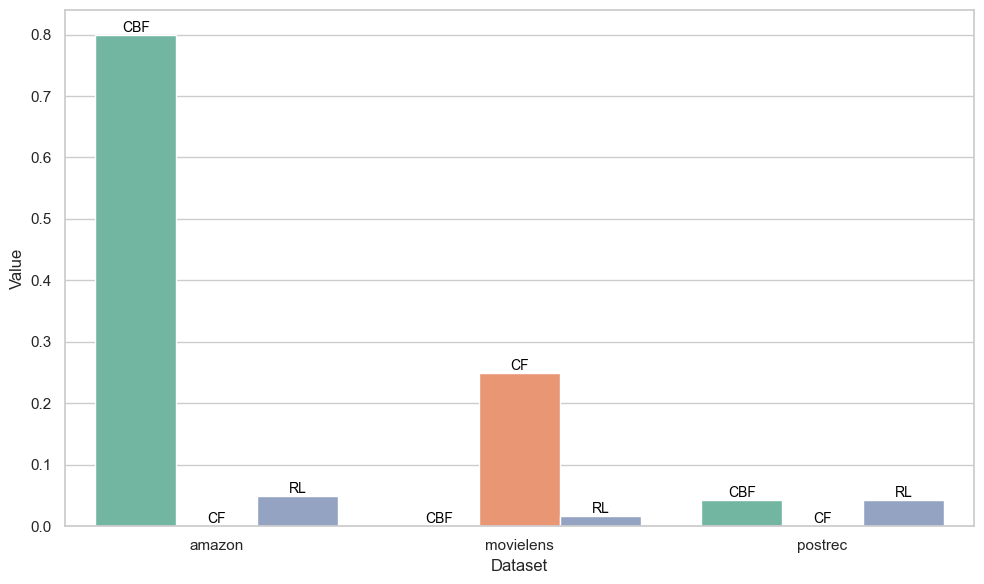

In [169]:
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Filtrujemy dataframe dla danej metryki
    df_metric = merged_df[merged_df['key'] == metric]

    # Tworzymy wykres słupkowy
    ax = sns.barplot(
        data=df_metric,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2'
    )
    ax.legend_.remove()

    # Iterujemy po słupkach (patches) i wierszach dataframe w **tej samej kolejności**
    for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )

    plt.ylabel('Value')
    plt.xlabel('Dataset')
    plt.tight_layout()
    plt.show()


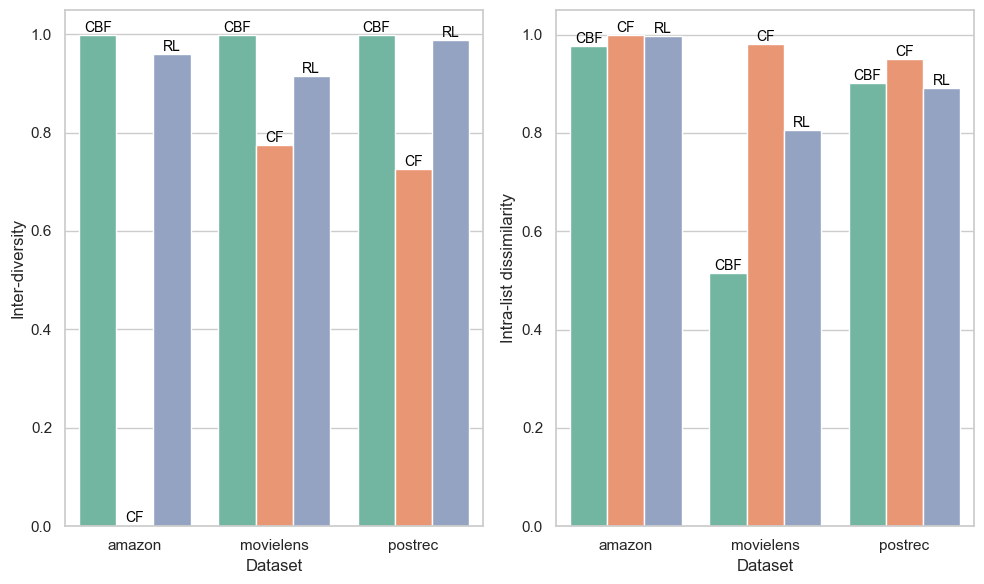

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładamy, że masz wczytany merged_df

metrics_to_plot = ['personalization', 'intra_list_dissimilarity']

# Usuń sharey=True, żeby każda oś miała własną etykietę Y
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

for ax, metric in zip(axes, metrics_to_plot):
    df_metric = merged_df[merged_df['key'] == metric]

    sns.barplot(
        data=df_metric,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )

    ax.legend_.remove()

    for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    if metric == 'personalization':
        metric = 'Inter-diversity'
    elif metric == 'intra_list_dissimilarity':
        metric = 'Intra-list dissimilarity'
    ax.set_ylabel(metric)  # etykieta osi Y
    ax.set_xlabel('Dataset')  # etykieta osi X

plt.tight_layout()
plt.savefig(f'{folder_path}/fig/between_intra_dissimilarity.png')
plt.show()

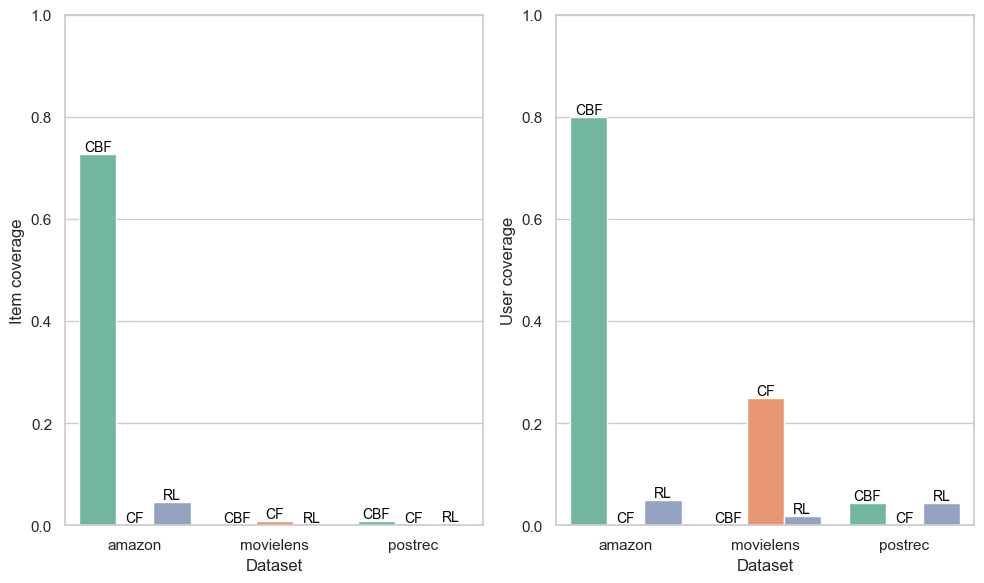

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładamy, że masz wczytany merged_df

metrics_to_plot = ['item_coverage', 'user_coverage']

# Usuń sharey=True, żeby każda oś miała własną etykietę Y
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

for ax, metric in zip(axes, metrics_to_plot):
    df_metric = merged_df[merged_df['key'] == metric]

    sns.barplot(
        data=df_metric,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )

    ax.legend_.remove()

    for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    if metric == 'item_coverage':
        metric = 'Item coverage'
    elif metric == 'user_coverage':
        metric = 'User coverage'
    ax.set_ylabel(metric)  # etykieta osi Y
    ax.set_xlabel('Dataset')  # etykieta osi X

    ax.set_ylim(0, 1)  # limit osi Y od 0 do 1

plt.tight_layout()
plt.savefig(f'{folder_path}/fig/item_user_coverage.png')
plt.show()


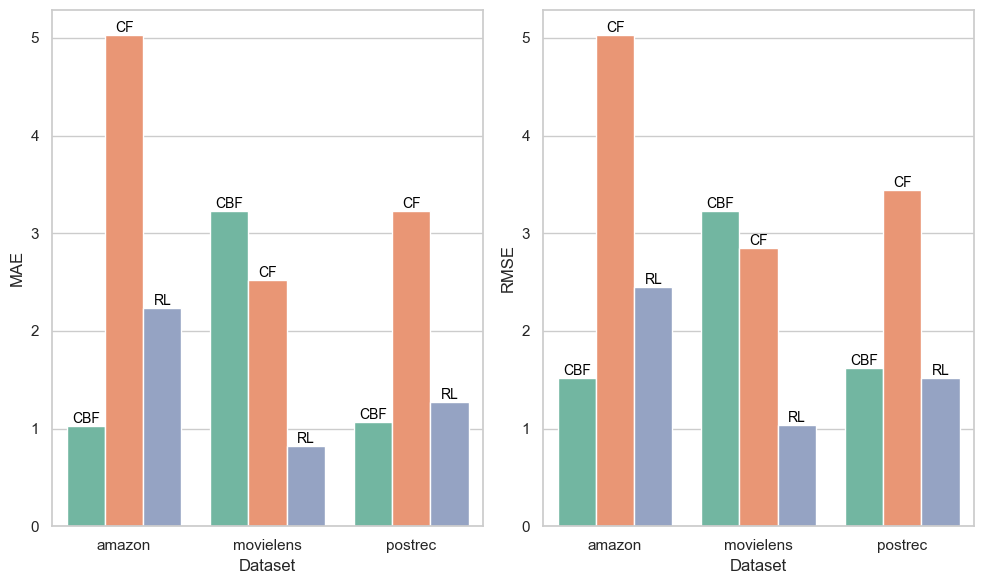

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładamy, że masz wczytany merged_df

metrics_to_plot = ['mae', 'rmse']

# Usuń sharey=True, żeby każda oś miała własną etykietę Y
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

for ax, metric in zip(axes, metrics_to_plot):
    df_metric = merged_df[merged_df['key'] == metric]

    sns.barplot(
        data=df_metric,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )

    ax.legend_.remove()

    for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    if metric == 'mae':
        metric = 'MAE'
    elif metric == 'rmse':
        metric = 'RMSE'
    ax.set_ylabel(metric)  # etykieta osi Y
    ax.set_xlabel('Dataset')  # etykieta osi X

plt.tight_layout()
plt.savefig(f'{folder_path}/fig/mae_rmse.png')
plt.show()


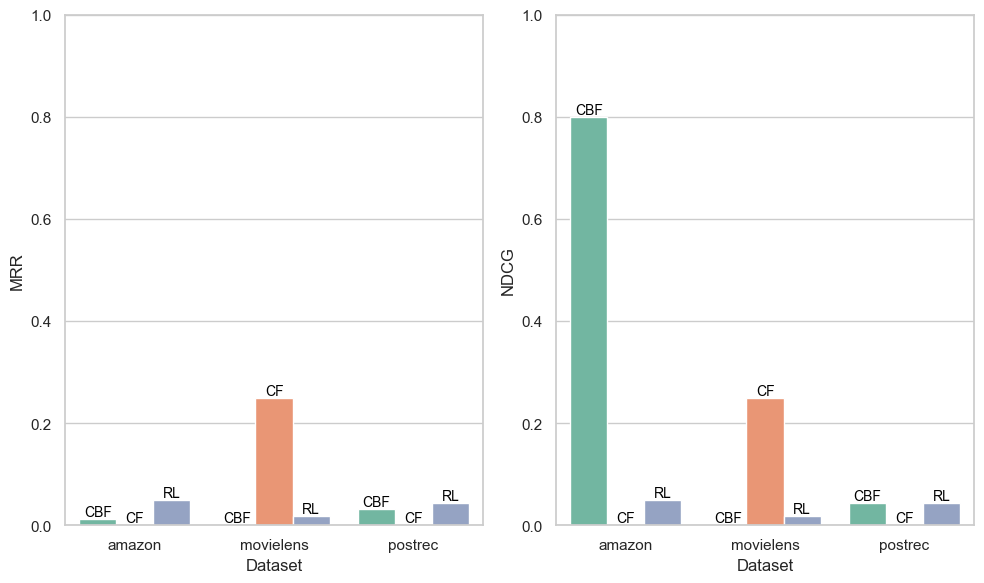

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładamy, że masz wczytany merged_df

metrics_to_plot = ['mrr', 'ndcg_at_k']

# Usuń sharey=True, żeby każda oś miała własną etykietę Y
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

for ax, metric in zip(axes, metrics_to_plot):
    df_metric = merged_df[merged_df['key'] == metric]

    sns.barplot(
        data=df_metric,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )

    ax.legend_.remove()

    for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    ax.set_ylim(0, 1)
    if metric == 'ndcg_at_k':
        metric='NDCG'
    elif metric == 'mrr':
        metric='MRR'
    ax.set_ylabel(metric)  # etykieta osi Y
    ax.set_xlabel('Dataset')  # etykieta osi X

plt.tight_layout()
plt.savefig(f'{folder_path}/fig/mrr_ndcg.png')
plt.show()

In [174]:
df_metric = merged_df[merged_df['key'].isin(['precision', 'precision_at_k'])]
df_metric
# Narysuj mi histogram tych danych

,run_id,key,value,step,timestamp,algorithm,dataset
7,27ce05397b4545b78be97db5c01755e4,precision,0.350000,0,1748966106149,CBF,amazon
8,27ce05397b4545b78be97db5c01755e4,precision_at_k,0.900000,0,1748966106149,CBF,amazon
20,7144ad2e921f42e18cb470aa97f24fea,precision,0.000000,0,1748965528212,CBF,movielens
21,7144ad2e921f42e18cb470aa97f24fea,precision_at_k,0.007042,0,1748965528212,CBF,movielens
33,73d54a1890df48489669757ece0053e8,precision,0.032189,0,1748966646529,CBF,postrec
34,73d54a1890df48489669757ece0053e8,precision_at_k,0.105150,0,1748966646529,CBF,postrec
46,5cc8c130fb9647d78799fcb5ff7648ae,precision,0.000000,0,1748966202556,CF,amazon
47,5cc8c130fb9647d78799fcb5ff7648ae,precision_at_k,0.000000,0,1748966202556,CF,amazon
59,8261d72b5124421ca6ca75609af6c553,precision,0.250000,0,1748965911852,CF,movielens
60,8261d72b5124421ca6ca75609af6c553,precision_at_k,0.681034,0,1748965911852,CF,movielens


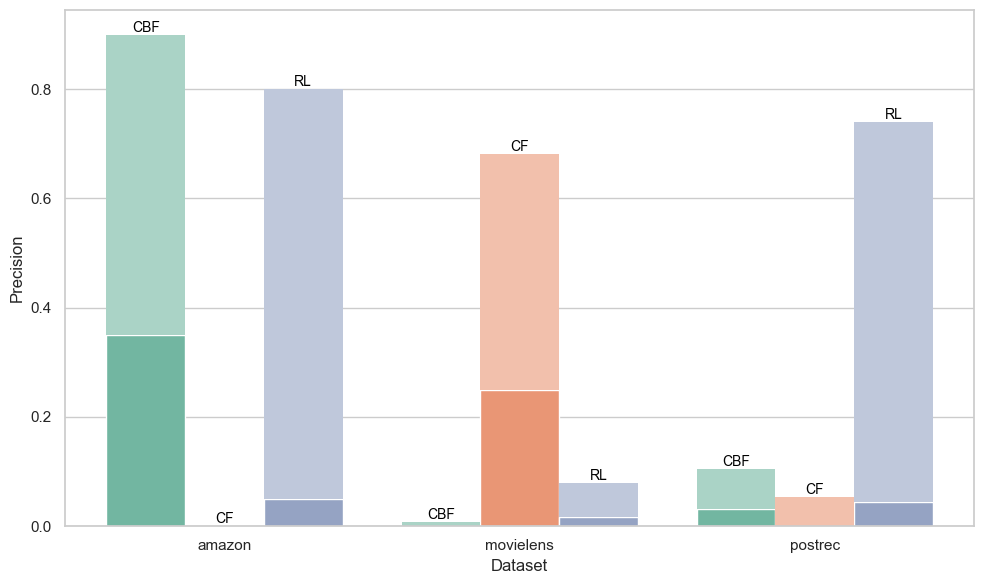

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))

df_precision = merged_df[merged_df['key'] == 'precision']
df_precision_at_k = merged_df[merged_df['key'] == 'precision_at_k']

ax = sns.barplot(
    data=df_precision,
    x='dataset',
    y='value',
    hue='algorithm',
    palette='Set2'
)
ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
bar_colors = [patch.get_facecolor() for patch in handles]

algo_colors = dict(zip(labels, bar_colors))

for p, (_, row) in zip(ax.patches, df_precision_at_k.iterrows()):
    height = p.get_height()
    algo = row['algorithm']

    if not pd.isna(height):
        base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
        lighter_color = mcolors.to_rgba(base_color)
        lighter_rgb = mcolors.to_rgb(lighter_color[:3])
        lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

        ax.bar(
            p.get_x() + p.get_width() / 2,
            row['value'] - height,
            width=p.get_width(),
            bottom=height,
            align='center',
            color=lighter_rgb,
            edgecolor='none'
        )

        ax.annotate(
            algo,
            (p.get_x() + p.get_width() / 2, row['value']),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
plt.ylabel('Precision')
plt.xlabel('Dataset')
plt.tight_layout()
# plt.savefig(f'{folder_path}/fig/precision.png')
plt.show()


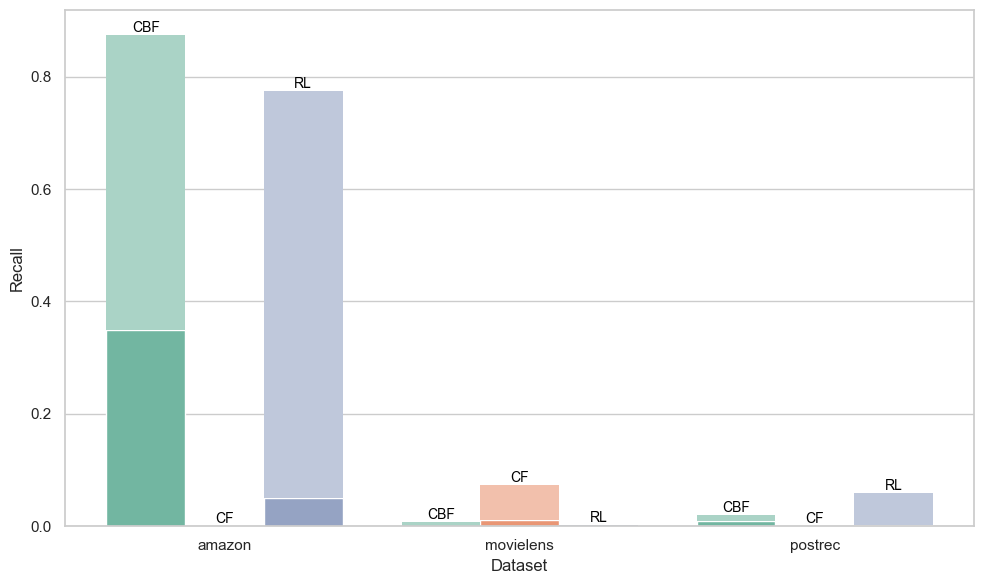

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

df_recall = merged_df[merged_df['key'] == 'recall']
df_recall_at_k = merged_df[merged_df['key'] == 'recall_at_k']

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_recall,
    x='dataset',
    y='value',
    hue='algorithm',
    palette='Set2'
)
ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
bar_colors = [patch.get_facecolor() for patch in handles]

algo_colors = dict(zip(labels, bar_colors))



for p, (_, row) in zip(ax.patches, df_recall_at_k.iterrows()):
    height = p.get_height()
    algo = row['algorithm']

    if not pd.isna(height):
        base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
        lighter_color = mcolors.to_rgba(base_color)
        lighter_rgb = mcolors.to_rgb(lighter_color[:3])
        lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

        ax.bar(
            p.get_x() + p.get_width() / 2,
            row['value'] - height,
            width=p.get_width(),
            bottom=height,
            align='center',
            color=lighter_rgb,
            edgecolor='none'
        )

        ax.annotate(
            algo,
            (p.get_x() + p.get_width() / 2, row['value']),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )

plt.ylabel('Recall')
plt.xlabel('Dataset')
plt.tight_layout()
# plt.savefig(f'{folder_path}/fig/recall.png')
plt.show()


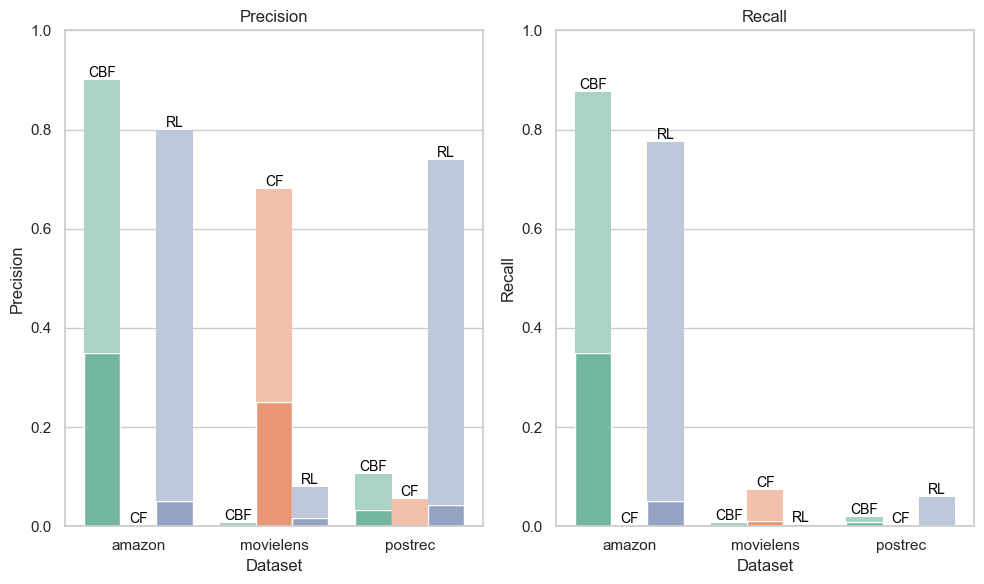

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

# Precision plot
df_precision = merged_df[merged_df['key'] == 'precision']
df_precision_at_k = merged_df[merged_df['key'] == 'precision_at_k']

ax = axes[0]
sns.barplot(
    data=df_precision,
    x='dataset',
    y='value',
    hue='algorithm',
    palette='Set2',
    ax=ax
)
ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
bar_colors = [patch.get_facecolor() for patch in handles]
algo_colors = dict(zip(labels, bar_colors))

for p, (_, row) in zip(ax.patches, df_precision_at_k.iterrows()):
    height = p.get_height()
    algo = row['algorithm']
    if not pd.isna(height):
        base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
        lighter_color = mcolors.to_rgba(base_color)
        lighter_rgb = mcolors.to_rgb(lighter_color[:3])
        lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

        ax.bar(
            p.get_x() + p.get_width() / 2,
            row['value'] - height,
            width=p.get_width(),
            bottom=height,
            align='center',
            color=lighter_rgb,
            edgecolor='none'
        )
        ax.annotate(
            algo,
            (p.get_x() + p.get_width() / 2, row['value']),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
ax.set_ylabel('Precision')
ax.set_xlabel('Dataset')
ax.set_title('Precision')
ax.set_ylim(0, 1)

# Recall plot
df_recall = merged_df[merged_df['key'] == 'recall']
df_recall_at_k = merged_df[merged_df['key'] == 'recall_at_k']

ax = axes[1]
sns.barplot(
    data=df_recall,
    x='dataset',
    y='value',
    hue='algorithm',
    palette='Set2',
    ax=ax
)
ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
bar_colors = [patch.get_facecolor() for patch in handles]
algo_colors = dict(zip(labels, bar_colors))

for p, (_, row) in zip(ax.patches, df_recall_at_k.iterrows()):
    height = p.get_height()
    algo = row['algorithm']
    if not pd.isna(height):
        base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
        lighter_color = mcolors.to_rgba(base_color)
        lighter_rgb = mcolors.to_rgb(lighter_color[:3])
        lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

        ax.bar(
            p.get_x() + p.get_width() / 2,
            row['value'] - height,
            width=p.get_width(),
            bottom=height,
            align='center',
            color=lighter_rgb,
            edgecolor='none'
        )
        ax.annotate(
            algo,
            (p.get_x() + p.get_width() / 2, row['value']),
            ha='center', va='bottom',
            fontsize=10, color='black'
        )
ax.set_ylabel('Recall')
ax.set_xlabel('Dataset')
ax.set_title('Recall')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig(f'{folder_path}/fig/precision_recall.png')
plt.show()


In [178]:
# # Zapisz wynik do pliku
# merged_df.to_csv(f"{folder_path}/merged_metrics.csv", index=False)

# print("Merge completed! Output saved as merged_metrics.csv.")